In [ ]:
from google.colab import drive # Mount the google drive for data loading
drive.mount('/content/drive')

Mounted at /content/drive


# Import some related dependencies
1.   Numpy: a package for array transformation
2.   Scipy: a package for loading data with (.mat) format
3.   Mpl_toolkits: for 3D-plot visualization
4.   Matplotlib: a package for data visualization
5.   Skearn: a package including many machine learning approaches

In [ ]:
import numpy as np #helps for array operation
import scipy.io as sio #helps to read the data
from mpl_toolkits.mplot3d import Axes3D #helps for 3D plots
import matplotlib.pyplot as plt #helps with graphical plots
from sklearn.neighbors import KNeighborsClassifier as KNN #helps for classification
from sklearn.preprocessing import OneHotEncoder #helps for label one-hot encoding 
from sklearn.metrics import accuracy_score #helps to evaluate the prediction accuracy

# Load data using Scipy package
Data structure and data visualiazation


In [ ]:
data = sio.loadmat('/content/drive/MyDrive/lab_code/Iris.mat')  #Load data with the corresponding path in google drive 
X, y = data['X'], data['y']      #Data and labels

In [ ]:
print ('Size of X:', X.shape) #Size of input 
print ('Size of y:', y.shape) #Size of labels

Shape of X: (150, 4)
Shape of y: (150, 1)


In [ ]:
onehot = OneHotEncoder()                     #An objective for one-hot package
y_onehot = onehot.fit_transform(y).toarray() #Transform labels to be the one-hot format. For example, a sample belongs to the first class(denoted by 0), then its label will be transformed to be [1, 0, 0] for a three-way classification.

In [ ]:
print (y_onehot.shape) #Size of labels after transformation
print (y[0])           
print (y_onehot[0])

(150, 3)
[0]
[1. 0. 0.]


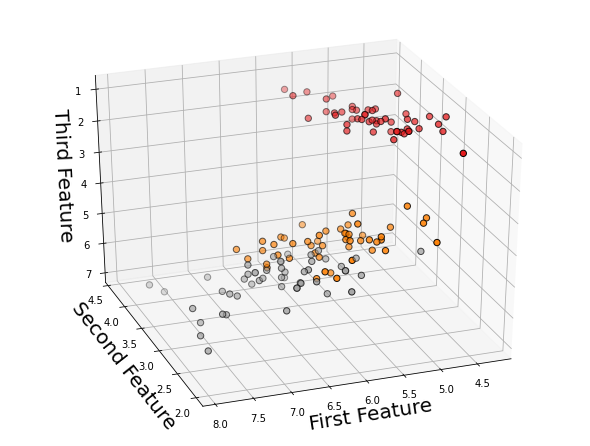

In [ ]:
# 3D Visualization
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Set1, edgecolor="k", s=40)
ax.set_xlabel("First Feature", fontsize=20)
ax.set_ylabel("Second Feature", fontsize=20)
ax.set_zlabel("Third Feature", fontsize=20)
plt.show()

# Model training

In [ ]:
classifier = KNN(n_neighbors=15).fit(X, y_onehot)     # Model fitting using the KNN classifier
fitted_train = classifier.predict(X)                  # Predict the training set

In [ ]:
print (accuracy_score(fitted_train, y_onehot))        # Evaluate the accuracy in the training set

0.9866666666666667


# Model testing and a simple case for classification

In [ ]:
X_test = np.asarray([5, 4, 1.6, 0.1]).reshape(1, -1) # A test sample with features of [5, 4, 1.6, 0.1], and it will be reshaped to (1,4)
print (classifier.predict(X_test))

[[1. 0. 0.]]
